In [9]:
#!pip install pyarrow
import pandas as pd

coffee_ratings = pd.read_feather('datasets/coffee_ratings_full.feather')
display(coffee_ratings.columns)


Index(['total_cup_points', 'species', 'owner', 'country_of_origin',
       'farm_name', 'lot_number', 'mill', 'ico_number', 'company', 'altitude',
       'region', 'producer', 'number_of_bags', 'bag_weight',
       'in_country_partner', 'harvest_year', 'grading_date', 'owner_1',
       'variety', 'processing_method', 'aroma', 'flavor', 'aftertaste',
       'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness',
       'cupper_points', 'moisture', 'category_one_defects', 'quakers', 'color',
       'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [23]:
import numpy as np

pts_vs_flavor_pop = coffee_ratings[["total_cup_points", "flavor"]]
display(pts_vs_flavor_pop.head())

#return a random subset of rows
pts_vs_flavor_pop = pts_vs_flavor_pop.sample(n=10)
print(pts_vs_flavor_pop)

cup_points_samp = coffee_ratings["total_cup_points"].sample(n=10)
print(cup_points_samp)

print(np.mean(pts_vs_flavor_pop["total_cup_points"]))
print(np.mean(cup_points_samp))

#working with pandas is better than numpy
print(pts_vs_flavor_pop["flavor"].mean())

pts_vs_flavor_samp = coffee_ratings[["total_cup_points", "flavor"]].sample(n=10)
print(pts_vs_flavor_samp["flavor"].mean())


,total_cup_points,flavor
0,90.58,8.83
1,89.92,8.67
2,89.75,8.50
3,89.00,8.58
4,88.83,8.50


      total_cup_points  flavor
249              84.00    7.67
697              82.42    7.58
1001             81.00    7.25
829              81.92    7.58
17               87.33    8.33
449              83.17    7.50
968              81.25    7.50
882              81.67    7.33
152              84.58    7.75
492              83.08    7.33
1168    79.58
641     82.58
211     84.17
441     83.17
1003    81.00
1153    79.75
1170    79.50
707     82.33
697     82.42
662     82.50
Name: total_cup_points, dtype: float64
83.042
81.69999999999999
7.581999999999999
7.606999999999999


In [27]:
print(coffee_ratings["total_cup_points"].mean())

print(coffee_ratings["total_cup_points"].head(10).mean())

#the convenience sample isn't representative of the whole population.


82.15120328849028
89.1


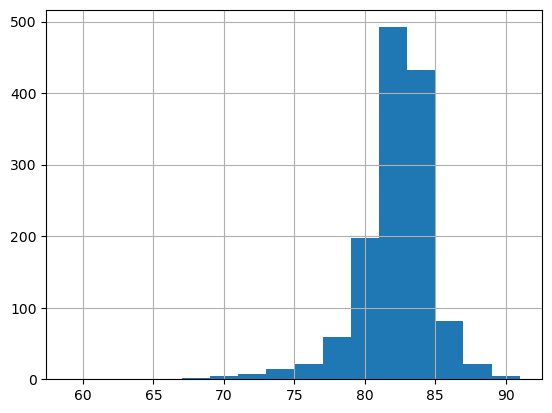

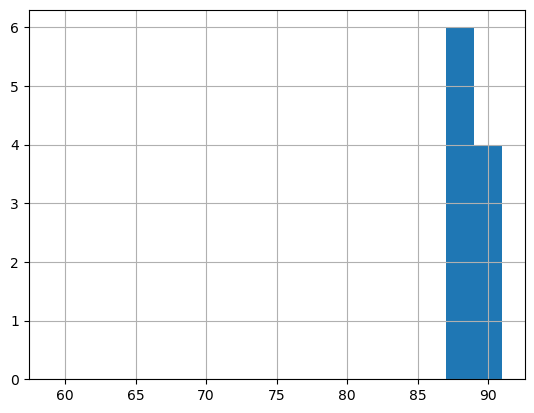

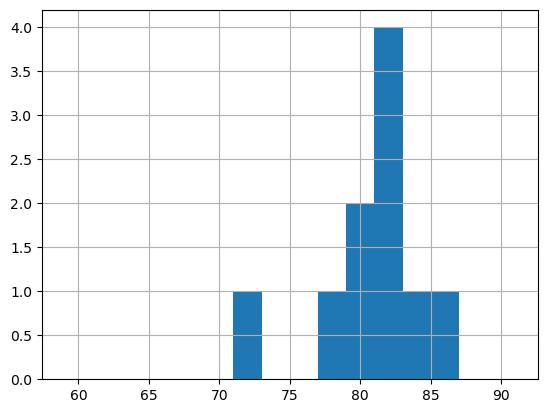

In [30]:
#Visualizing selection bias

#create a histogram of the total cup points from the population
import matplotlib.pyplot as plt
import numpy as np
coffee_ratings["total_cup_points"].hist(bins=np.arange(59,93,2))
plt.show()

#for the convenience sample
coffee_ratings["total_cup_points"].head(10).hist(bins=np.arange(59,93,2))
plt.show()

#the distribution of the sample is not the same as the population

#for a random sample
coffee_ratings.sample(10)["total_cup_points"].hist(bins=np.arange(59,93,2))
plt.show()


In [46]:
#Relative error of point estimate

#sample size is number of rows
print(len(coffee_ratings.sample(n=300)))
print(len(coffee_ratings.sample(frac=0.25)))

#Calculate a population parameter
population_mean = coffee_ratings["total_cup_points"].mean()
print(population_mean)

#with a sample size of ten
sample_mean10 = coffee_ratings.sample(n=10)["total_cup_points"].mean()
sample_mean100 = coffee_ratings.sample(n=100)["total_cup_points"].mean()
sample_mean1000 = coffee_ratings.sample(n=1000)["total_cup_points"].mean()

print(sample_mean10, sample_mean100, sample_mean1000)

#larger sample sizes give more accurate results


300
334
82.15120328849028
81.65 82.53849999999998 82.12374000000001


In [47]:
#Relative error
#compare population mean and sample mean

rel_error_pct_10 = 100 * abs(population_mean - sample_mean10) / population_mean
rel_error_pct_100 = 100 * abs(population_mean - sample_mean100) / population_mean
rel_error_pct_1000 = 100 * abs(population_mean - sample_mean1000) / population_mean

#relative error versus sample size
print(rel_error_pct_10, rel_error_pct_100, rel_error_pct_1000)

#the relative error decreases as the sample size increases

0.6100985359036054 0.47144374763402563 0.033430171915832384
